In [ ]:
!pip install transformers scikit-learn nltk pandas torch -q

In [ ]:
#installing all necessary libraries
import pandas as pd
import numpy as np
import nltk
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [ ]:
#downloading nltk resources
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
fake=pd.read_csv("/content/Fake.csv")
true=pd.read_csv("/content/True.csv")

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
#assigning labels
fake['label'] = 0
true['label'] = 1

In [ ]:
fake.shape,true.shape

((23481, 5), (21417, 5))

In [ ]:
#combine both csvs and shuffle
df= pd.concat([fake,true],ignore_index=True)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df=df.drop(['title','subject','date'], axis=1)

In [ ]:
df.isnull().sum()

,0
text,0
label,0


In [ ]:
df= df.sample(frac=1)

In [ ]:
df.head()


,text,label
1878,We all remember the uproar over at Fox News a ...,0
14260,This video should be viewed by every middle sc...,0
27947,WASHINGTON (Reuters) - A U.S. House of Represe...,1
12813,"University of Wisconsin Madison, where NOT to ...",0
12144,,0


In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
df

,text,label
0,We all remember the uproar over at Fox News a ...,0
1,This video should be viewed by every middle sc...,0
2,WASHINGTON (Reuters) - A U.S. House of Represe...,1
3,"University of Wisconsin Madison, where NOT to ...",0
4,,0
...,...,...
44893,"When watching Donald Trump speak, you d think ...",0
44894,MOGADISHU (Reuters) - A car bomb exploded outs...,1
44895,Sean Hannity was on fire with his opening comm...,0
44896,WASHINGTON (Reuters) - Republican and Democrat...,1


In [ ]:
#Preprocessing text using lemmatization and stop words
stop_words= set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]','',str(text))
    tokens = nltk.word_tokenize(text.lower())
    cleaned = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and w.isalpha()]
    return text


In [ ]:
df['clean_text'] = df['text'].apply(preprocess)

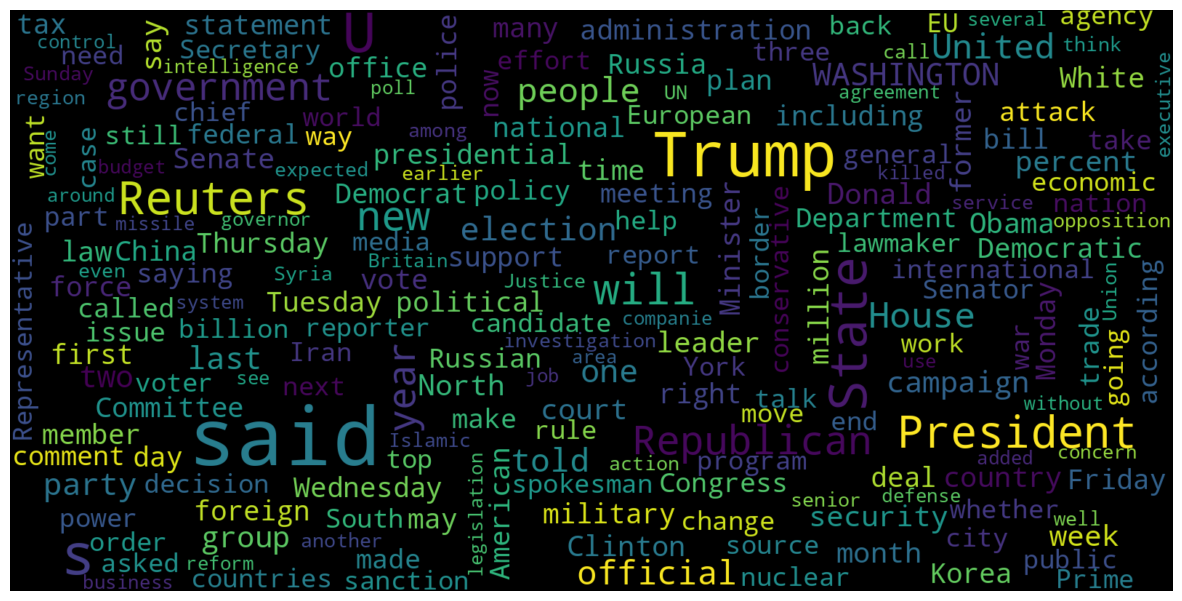

In [ ]:
# Word Cloud FOr real
consolidates =' '.join(
    word for word in df['clean_text'][df['label']== 1].astype(str))
wordCloud= WordCloud(
  width=1600, height=800, random_state=21, max_font_size=110, collocations= False)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidates), interpolation='bilinear')
plt.axis('off')
plt.show()

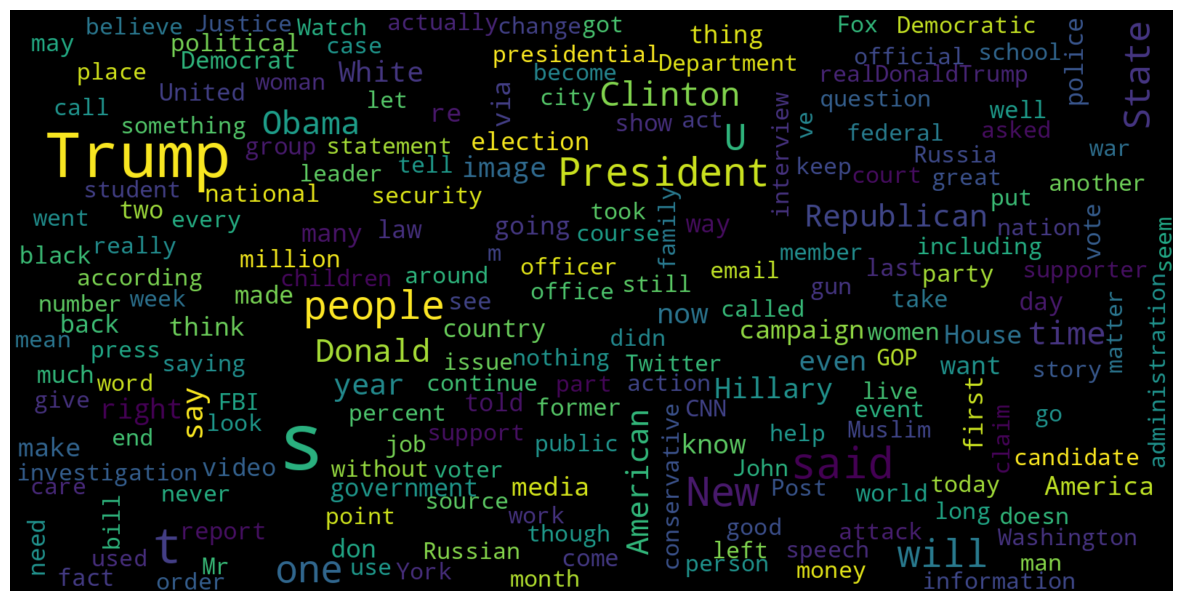

In [ ]:
# Word Cloud FOr FAKE
consolidates =' '.join(
    word for word in df['clean_text'][df['label']== 0].astype(str))
wordCloud= WordCloud(
  width=1600, height=800, random_state=21, max_font_size=110, collocations= False)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidates), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#generate bert embedding

# loading model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()

#check for gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

#function to get batch embeddings
def get_bert_embeddings(text, batch_size=32):
    all_embeddings = []

    for i in tqdm(range(0,len(text),batch_size)):
        batch = text[i:i+batch_size]

        #tokenize batch
        encoded = tokenizer(batch,
                            return_tensors = 'pt',
                            truncation = True,
                            padding ='max_length',
                            max_length=128).to(device)
        inputs = {key:val.to(device) for key, val in encoded.items()}

        #bert outputs
        with torch.no_grad():
            outputs = bert_model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()

        all_embeddings.append(embeddings)

    #concatenate all batches into a single array
    return np.vstack(all_embeddings)

#convert embeddings to numpy array
text_data = df['clean_text'].tolist()
bert_embeddings = get_bert_embeddings(text_data)

#save to df
df['embedding'] = list(bert_embeddings)

#verifying the alighment
print(f"DataFrame length is:{len(df)}")
print(f"Bert embeddings shape is:{bert_embeddings.shape}")

100%|██████████| 1404/1404 [09:22<00:00,  2.50it/s]

DataFrame length is:44898
Bert embeddings shape is:(44898, 768)


In [ ]:
# Split Train/Test Data
X= np.vstack(df['embedding'].values)
y =df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)

In [ ]:
#Train Logistic Regression
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred_LR = LR.predict(X_test)

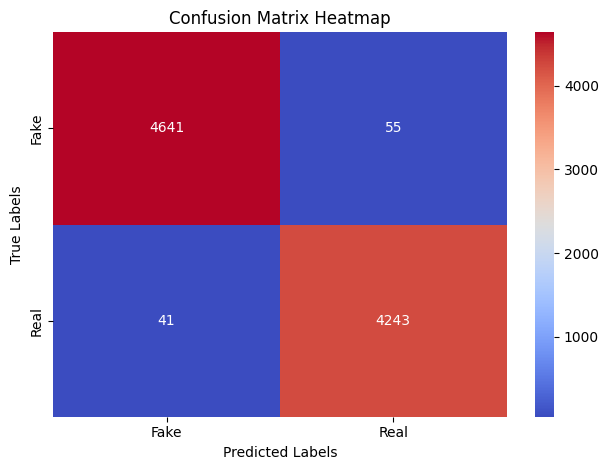

In [ ]:
con = confusion_matrix(y_test, pred_LR)
labels = ['Fake', 'Real']
sns.heatmap(con, annot=True, fmt='d', cmap='coolwarm', xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
#Evaluate
print("\n|Evaluatation|")
print(f"Accuracy: {round(accuracy_score(y_test,pred_LR)*100,2)}%")
print("\n Classification Report:\n ",classification_report(y_test,pred_LR))
print("\n Confusion Matrix:\n ",confusion_matrix(y_test,pred_LR,))




|Evaluatation|
Accuracy: 98.93%

 Classification Report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 Confusion Matrix:
  [[4641   55]
 [  41 4243]]


In [ ]:
from xgboost import XGBClassifier
xgb= XGBClassifier(n_estimators=100, max_depth=6, learning_Rate=0.1, use_label_encoder= False,
                       eval_metric='logloss')
xgb.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "learning_Rate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_Rate=0.1, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
pred_xg = xgb.predict(X_test)


In [ ]:
#Evaluate
print("\n||Evaluatation||")
print(f"Accuracy: {round(accuracy_score(y_test,pred_xg)*100,2)}%")
print("\n Classification Report:\n ",classification_report(y_test,pred_xg))
print("\n Confusion Matrix:\n ",confusion_matrix(y_test,pred_xg,))


||Evaluatation||
Accuracy: 98.0%

 Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.98      0.98      4696
           1       0.98      0.98      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980


 Confusion Matrix:
  [[4615   81]
 [  99 4185]]


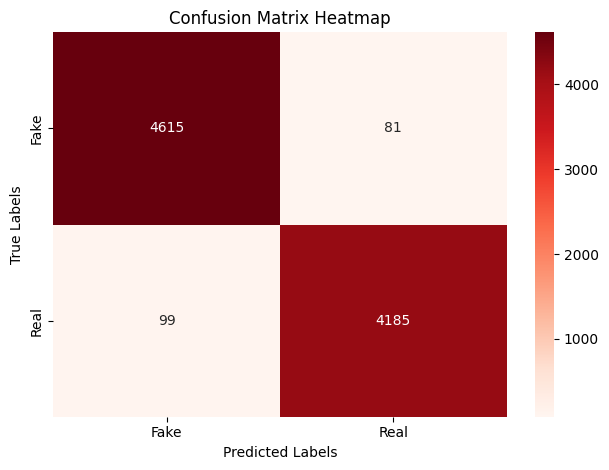

In [ ]:
con = confusion_matrix(y_test, pred_xg)
labels = ['Fake', 'Real']
sns.heatmap(con, annot=True, fmt='d', cmap='Reds', xticklabels= labels, yticklabels= labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
def output(n):
  if n==0:
    return "Fake News"
  elif n==1:
    return "True News"

def testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["clean_text"] = new_def_test["text"].apply(preprocess).apply(str)
  new_x_test = new_def_test["clean_text"].tolist()
  new_xv_test = get_bert_embeddings(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_xg = xgb.predict(new_xv_test)

  return print(f"\nLogistic Regression Prediction: {output(pred_LR[0])}\nXGB Prediction: {output(pred_xg[0])}")

In [ ]:
test_news = input("Enter News: ").strip()
testing(test_news)


Enter News: WASHINGTON (Reuters) - A Georgian-American businessman who met then-Miss Universe pageant owner Donald Trump in 2013, has been questioned by congressional investigators about whether he helped organize a meeting between Russians and Trumpâ€™s eldest son during the 2016 election campaign, four sources familiar with the matter said. The meeting at Trump Tower in New York involving Donald Trump Jr. and other campaign advisers is a focus of probes by Congress and Special Counsel Robert Mueller on whether campaign officials colluded with Russia when it sought to interfere in the U.S. election, the sources said. Russia denies allegations by U.S. intelligence agencies that it meddled in the election and President Donald Trump denies any collusion. The Senate and House of Representatives intelligence committees recently questioned behind closed doors Irakly Kaveladze, a U.S. citizen born in the former Soviet republic of Georgia, the sources said. He is a U.S.-based representative o

100%|██████████| 1/1 [00:00<00:00, 24.81it/s]


Logistic Regression Prediction: True News
XGB Prediction: True News
